<a href="https://colab.research.google.com/github/Aravindkumar-Rajendran/EVA/blob/master/Session_4_2nd_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPROVEMENTS

1. Batch Normalization  
2. LR change 
3. Batch_size change to 50


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


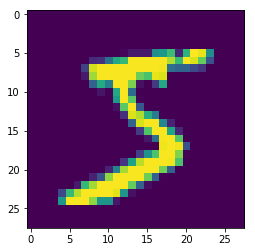

In [38]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [41]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [43]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2,2))
model.add(Conv2D(10, 1, 1, activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(10, 5, 5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykerne

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_17 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_18 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 10)        910       
_________________________________________________________________
batch_normalization_19 (Batc (None, 22, 22, 10)        40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 10)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr = 0.003),
             metrics=['accuracy'])

In [47]:
model.fit(X_train, Y_train, batch_size=50, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.2394 - acc: 0.9558
Epoch 2/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.0826 - acc: 0.9805
Epoch 3/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0613 - acc: 0.9841
Epoch 4/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0508 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 15s 254us/step - loss: 0.0421 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0389 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0358 - acc: 0.9900
Epoch 8/10
60000/60000 [==============================] - 15s 255us/step - loss: 0.0305 - acc: 0.9914
Epoch 9/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0287 - acc: 0.9917
Epoch 10/10
60000/60000 [=========

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [49]:
print(score)

[0.029741931909089907, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [51]:
print(y_pred[:9])
print(y_test[:9])

[[1.0463850e-05 2.7847889e-06 1.1709002e-05 7.0512733e-06 4.9243195e-06
  7.5335009e-08 5.8451374e-06 9.9992800e-01 4.4167461e-08 2.8997445e-05]
 [2.3422228e-06 2.3493994e-06 9.9977273e-01 1.5752032e-06 6.9342659e-06
  9.1535100e-08 1.5050001e-04 6.0908609e-05 2.1577216e-06 4.4487717e-07]
 [1.5017661e-05 9.9926168e-01 3.3057356e-06 6.6241759e-05 1.1778778e-05
  1.2344482e-06 1.2380257e-05 6.0502277e-04 1.1387610e-05 1.1939486e-05]
 [9.9934393e-01 2.0261545e-05 1.5725447e-05 3.4106459e-04 6.2663753e-06
  5.1457096e-06 2.2615366e-04 8.7830149e-06 3.0882264e-05 1.7334445e-06]
 [2.3612349e-05 2.4946927e-04 5.5714776e-07 2.6512856e-05 9.9924231e-01
  3.1898201e-06 7.6054079e-05 1.5668677e-04 5.9285281e-07 2.2099665e-04]
 [5.0755898e-05 9.9811858e-01 4.8686111e-06 7.4498697e-05 2.5789999e-05
  5.2234833e-07 9.7943175e-06 1.6703237e-03 1.3665468e-05 3.1031876e-05]
 [2.1454781e-07 6.4942760e-06 9.7923953e-07 2.4148568e-07 9.9992204e-01
  1.0164911e-06 5.6531130e-06 6.5458603e-06 1.0278784e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored